In [1]:
import pandas as pd
import numpy as np
import os, sys
import re,glob
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from tqdm import tqdm, trange

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rc("font",family="Arial")

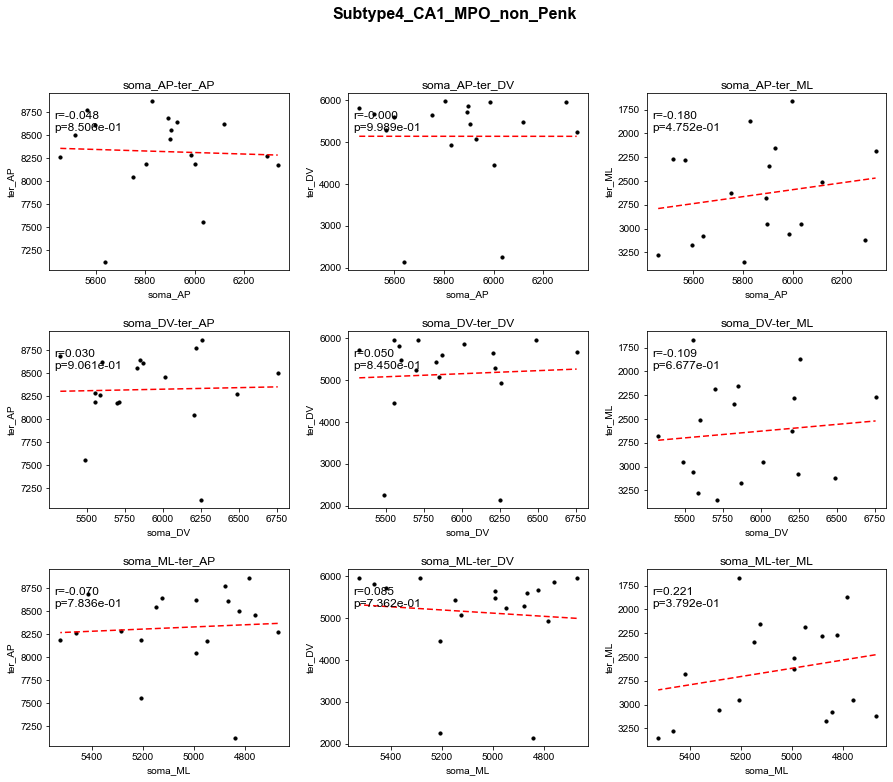

In [3]:
region = ["CA1"]
dfplot2 = pd.read_csv("non_Penk_CA1_terminal_infor.csv",index_col=0)
fig, axs = plt.subplots(3, 3, figsize=(15, 12))
for i,soma_label in enumerate(["soma_AP","soma_DV","soma_ML"]):
        for j,ter_label in enumerate(["ter_AP","ter_DV","ter_ML"]):
                x = dfplot2[soma_label]
                y = dfplot2[ter_label]

                regression_result = linregress(x, y)
                axs[i, j].scatter(x=x, y=y, s=10,c= "black")
                axs[i, j].plot([min(x), max(x)],
                        [min(x) * regression_result.slope + regression_result.intercept,
                        max(x) * regression_result.slope + regression_result.intercept],
                        c='red',
                        linewidth=1.5,
                        dashes=[4, 2]
                        )
                textstr = '\n'.join(['r={:.3f}'.format(regression_result.rvalue),
                        'p={:.3e}'.format(regression_result.pvalue)])
                axs[i, j].text(x = 0.02,
                        y = 0.9,   
                        s = textstr,
                        transform=axs[i, j].transAxes, 
                        fontsize=12,
                        verticalalignment='top'
                        )

                if soma_label.__contains__("ML"):
                        axs[i, j].invert_xaxis()

                if ter_label.__contains__("ML"):
                        axs[i, j].invert_yaxis()

                axs[i, j].set_title(soma_label+"-"+ter_label)
                axs[i, j].set_xlabel(soma_label)
                axs[i, j].set_ylabel(ter_label)
plt.suptitle('Subtype4_%s_MPO_non_Penk'%region[0], fontsize=16, fontweight='bold')
plt.subplots_adjust(wspace=0.25, hspace=0.35) 
plt.savefig("Subtype4_%s_MPO_non_Penk.jpg"%region[0],dpi=600)
plt.savefig("Subtype4_%s_MPO_non_Penk.pdf"%region[0],dpi=600)
plt.close()